Resources:
- https://www.datacamp.com/community/tutorials/wordcloud-python
- https://docs.streamlit.io/
-https://pythonprogramminglanguage.com/kmeans-text-clustering/
- https://www.analyticsvidhya.com/blog/2021/06/generate-reports-using-pandas-profiling-deploy-using-streamlit/
- https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3
- https://stackabuse.com/python-for-nlp-creating-a-rule-based-chatbot/


In [17]:
import pandas as pd
import numpy as np
import os
import pandas_profiling as pp
import streamlit as st
from streamlit_pandas_profiling import st_profile_report
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
import nltk
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import bs4 as bs
from sklearn.metrics.pairwise import cosine_similarity
import string
import docx
import textract
import re

%matplotlib inline

### Load ML for Good  Prolific Academic Data 
data_adult_apr_20, data_adult_apr_21, data_adult_may_20, data_adult_nov_20 

data_parent_apr_20, data_parent_apr_21, data_parent_may_20, data_parent_nov_20

In [22]:
path_to_prolific_data = "C:\\Users\\Administrator\Documents\MLforGood\ML-for-Good-Hackathon\Data\ProlificAcademic"

#April 2020Data
# Adult data
data_adult_apr_20 = pd.read_csv(path_to_prolific_data+"\April 2020\Data\CRISIS_Adult_April_2020.csv", low_memory=False) 
data_adult_apr_21 = pd.read_csv(path_to_prolific_data+"\April 2021\Data\CRISIS_Adult_April_2021.csv", low_memory=False)
data_adult_may_20 = pd.read_csv(path_to_prolific_data+"\May 2020\Data\CRISIS_Adult_May_2020.csv", low_memory=False)
#data_adult_nov_20 = pd.read_csv(path_to_prolific_data+"\November 2020\Data\CRISIS_Adult_November_2020.csv", low_memory=False)

# Parent data
data_parent_apr_20 = pd.read_csv(path_to_prolific_data+"\April 2020\Data\CRISIS_Parent_April_2020.csv", low_memory=False) 
data_parent_apr_21 = pd.read_csv(path_to_prolific_data+"\April 2021\Data\CRISIS_Parent_April_2021.csv", low_memory=False) 
data_parent_may_20 = pd.read_csv(path_to_prolific_data+"\May 2020\Data\CRISIS_Parent_May_2020.csv", low_memory=False) 
#data_parent_nov_20 = pd.read_csv(path_to_prolific_data+"\November 2020\Data\CRISIS_Parent_November_2020.csv", low_memory=False) 


### Concatenate parent data and display basic stats

In [17]:
all_parent_data = pd.concat([data_parent_apr_20,data_parent_apr_21,data_parent_may_20,data_parent_nov_20], ignore_index=True)


all_parent_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
country,7239.0,186.352535,2.730057,17.0,186.000000,186.0,187.0,187.000000
age,7228.0,43.086884,389.385569,0.0,34.000000,38.0,43.0,33137.000000
sex,2221.0,1.474561,0.505739,1.0,1.000000,1.0,2.0,3.000000
raceethnicity___1,3814.0,0.774777,0.417784,0.0,1.000000,1.0,1.0,1.000000
raceethnicity___2,3814.0,0.027530,0.163644,0.0,0.000000,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...
substanceproblems2,54.0,0.148148,0.358583,0.0,0.000000,0.0,0.0,1.000000
substancecomplaint2,54.0,0.037037,0.190626,0.0,0.000000,0.0,0.0,1.000000
Nov_cms_ave,775.0,2.169935,0.684103,1.0,1.700000,2.1,2.6,4.800000
Nov_cw_ave,777.0,2.173531,0.673257,1.0,1.666667,2.0,2.5,4.833333


### Concatenate adult data and display basic stats

In [20]:
all_adult_data = pd.concat([data_adult_apr_20,data_adult_apr_21, data_adult_may_20, data_adult_nov_20])


all_adult_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
country,10351.0,186.342189,3.335535,17.000000,186.000000,186.000000,187.000000,187.0
age,10340.0,38.956383,14.746920,10.000000,27.000000,36.000000,51.000000,83.0
sex,2839.0,1.579429,0.501526,1.000000,1.000000,2.000000,2.000000,3.0
raceethnicity___1,5091.0,0.677274,0.467565,0.000000,0.000000,1.000000,1.000000,1.0
raceethnicity___2,5091.0,0.022392,0.147971,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...
smokesoon,190.0,3.910526,0.321035,2.000000,4.000000,4.000000,4.000000,4.0
friendscigarette,190.0,3.800000,0.536499,1.000000,4.000000,4.000000,4.000000,4.0
Nov_cms_ave,849.0,2.639694,0.796700,1.000000,2.100000,2.600000,3.100000,5.0
Nov_cw_ave,858.0,2.713481,0.747382,1.166667,2.166667,2.666667,3.166667,5.0




###  Slice data and get interactive report on basic stats

In [42]:
features = ['age', 'sex', 'country', 'gender', 'raceethnicity___1']
sliced_parent_data = all_parent_data[features]
profile = pp.ProfileReport(sliced_parent_data, title='Pandas Profiling Report')
profile.to_widgets()

### Get HTML report

In [5]:
profile.to_file('myreport.html')




### Explore data with K-Means Clustering and WordCloud

Resources:
https://pythonprogramminglanguage.com/kmeans-text-clustering/
https://www.datacamp.com/community/tutorials/wordcloud-python

In [13]:
path_to_crisis_logger_data = "C:\\Users\\Administrator\Documents\MLforGood\ML-for-Good-Hackathon\Data\CrisisLogger\crisislogger.csv"
crisis_data = pd.read_csv(path_to_crisis_logger_data, low_memory=False) 
crisis_data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
upload_id,140.0,544.607143,137.206492,10.0,452.0,542.0,669.25,758.0


Cluster 0:


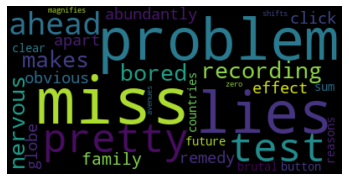

Cluster 1:


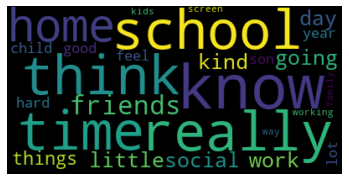

Cluster 2:


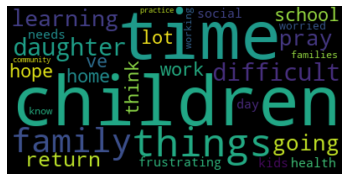

Cluster 3:


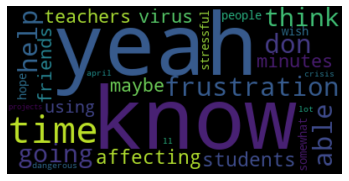

Cluster 4:


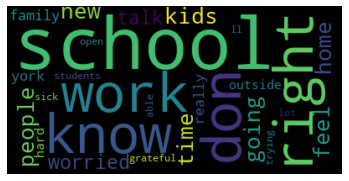

In [12]:
_dataframe = crisis_data
_clusters=5

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(_dataframe["transcriptions"])


model = KMeans(n_clusters=_clusters, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)


order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(_clusters):
    print("Cluster %d:" % i)
    mystr = ""
    for ind in order_centroids[i, :30]:
        mystr = mystr+ ' ' +terms[ind]
    
    wordcloud = WordCloud().generate(mystr)
    print(wordcloud)

# Display the generated image:
    st.set_option('deprecation.showPyplotGlobalUse', False)
    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")
    plt.show()
    



### Create a Rule-Based Chatbot based on FocusGroup data
Resource: https://stackabuse.com/python-for-nlp-creating-a-rule-based-chatbot/

In [18]:
path_to_focus_group_data = "C:\\Users\\Administrator\Documents\MLforGood\ML-for-Good-Hackathon\Data\FocusGroups\\"

focus_group_data = ''
for (root, dirs, files) in os.walk(path_to_focus_group_data, topdown=True):
    for file in files:
        print(file)
        focus_group_data = focus_group_data + str(textract.process(os.path.join(root, file)))
            

Gaming_Group1.docx
Gaming_Group2.docx
Gaming_Group3.docx
Gaming_Group4.docx
LowPIU_Group1.docx
LowPIU_Group2.docx
LowPIU_Group3.docx
Media_Group1.docx
Media_Group2.docx
Media_Group3.docx
Media_Group4.docx
Social_Group1.docx
Social_Group2.docx
Social_Group3.docx
Social_Group4.docx


In [8]:
print(focus_group_data)

b'Moderator 1:\n\n(silence)\n\nModerator 1:\n\n[inaudible 00:02:46]\n\nModerator 1:\n\nHi everyone. Welcome. Hi Parent 1, Parent 2, Parent 3. We\'re just going to wait for a couple more people to join.\n\nParent 2:\n\nGood afternoon.\n\nParent 1:\n\nHi.\n\nModerator 1:\n\n(silence)\n\nModerator 1:\n\n[inaudible 00:03:43]\n\nModerator 1:\n\n(silence)\n\nModerator 1:\n\n[inaudible 00:03:43].\n\nModerator 1:\n\nHi [Administrator 00:03:43], we\'re just waiting for everyone to join.\n\nAdministrator:\n\nAwesome.\n\nAdministrator:\n\n(silence)\n\nAdministrator:\n\nSo, Moderator 1, I just sent the link to one other parent who will be joining us. So, she\'ll probably come on in the next minute or two.\n\nModerator 1:\n\nOkay. Great. I think that Moderator 2 is joining also, so...\n\nModerator 1:\n\n(silence)\n\nModerator 1:\n\n[inaudible 00:05:22]\n\nParent 4:\n\nHi.\n\nModerator 1:\n\nHi Moderator 2.\n\nModerator 2:\n\n[inaudible 00:05:27].\n\nModerator 1:\n\nHi Parent 4.\n\nParent 4:\n\nHi.\

In [19]:

article_text = re.sub(r'\[[0-9]*\]', ' ', focus_group_data)
article_text = re.sub(r'\s+', ' ', focus_group_data)

article_sentences = nltk.sent_tokenize(focus_group_data)
article_words = nltk.word_tokenize(focus_group_data)

wnlemmatizer = nltk.stem.WordNetLemmatizer()

def perform_lemmatization(tokens):
    return [wnlemmatizer.lemmatize(token) for token in tokens]

punctuation_removal = dict((ord(punctuation), None) for punctuation in string.punctuation)

def get_processed_text(document):
    return perform_lemmatization(nltk.word_tokenize(document.lower().translate(punctuation_removal)))

In [20]:

def generate_response(user_input):
    
    article_sentences.append(user_input)

    word_vectorizer = TfidfVectorizer(tokenizer=get_processed_text, stop_words='english')
    all_word_vectors = word_vectorizer.fit_transform(article_sentences)
    similar_vector_values = cosine_similarity(all_word_vectors[-1], all_word_vectors)
    similar_sentence_number = similar_vector_values.argsort()[0][-2]

    matched_vector = similar_vector_values.flatten()
    matched_vector.sort()
    vector_matched = matched_vector[-2]

    if vector_matched == 0:
        print("Error")
        
    else:
        print(article_sentences[similar_sentence_number])

In [21]:
generate_response('I feel sad')

But now, it's a sad world what we're going to with these [inaudible 00:39:36].
